# Data Extraction and Collection for Top 200 Twitter Users Analysis

### **Preparation Step** 

Libraries that I used(Imported):

**Pandas:** Library I used to deal with Tablular data and statistical operations. 

**NumPy/Scipy:** Library for statistical analysis

**Matplotlib:** For plotting data 

In [2]:
try:
    import pandas as pd
    import numpy as np
    import scipy
    from matplotlib import pyplot as plt
    print ("Imported all libraries successfully...")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} numpy
    !conda install --yes --prefix {sys.prefix} pandas
    !conda install --yes --prefix {sys.prefix} matplotlib
    !conda install --yes --prefix {sys.prefix} scipy
    print ("Some libraries not found, installing...")

Imported all libraries successfully...


*Everything is imported successfully!*

# ETL Process:

**[Additional Transformations]**

- Functions used to clean up the data:

In [3]:
def clean_string(s):
    s = s.replace("\n\n\n", "\n")
    s = s.replace("\n\n", "\n")
    s = s.replace("\r\n", "\n")
    s = s.replace("\n", ",")
    s = s[1:]
    s = s[:-14]
    s = s.strip()
    s = s[:-1]
    return s

**clean strings** function is used to replace the messsy and spacings in the raw data.

In [4]:
def remove_category(entries):
    if len(entries) == 7:
        entries.pop(2)
    elif len(entries) == 8:
        entries.pop(3)
        entries.pop(2)
    elif len(entries) == 9:
        entries.pop(4)
        entries.pop(3)
        entries.pop(2)
    entries.pop(5)    
    return entries

**remove category** function is used to remove the categories that were not used or coming up correctly in the processed data.

In [5]:
def split_username(entries):
    newList = []
    newList = entries[1].strip().split(" ");
    if (len(newList) > 1):
        entries[1] = newList[0]
        entries.insert(2,newList[1])
    else :
        entries[1] = newList[0]
        entries.insert(2,"N/A")
    return entries

**split username** function is used for the first name for "Barack Obama," as there was an awkward spacing in it.

In [6]:
def number_replacement(entry):
    if "K" in entry:
        entry = entry[:-1]
        entry = int(float(entry))
    elif "M" in entry:
        entry = entry[:-1]
        entry = int(float(entry))
    else:
        entry = int(entry)
    return entry

**number replacement** function is used to remove the letters in the string for thousands(K) and millions(M) and is also converted into a float, then to an integer.

## Read the webpage and parse it with BeautifulSoup API

In [7]:
from bs4 import BeautifulSoup
import requests
open_webpage = requests.get("https://viralpitch.co/topinfluencers/twitter/top-200-twitter-influencers/")
print("Webpage opened successfully!")
twt_bs =  BeautifulSoup(open_webpage.content, "html.parser")
print ("Webpage loaded and parsed successfully!")

#extracted from Hands-On-Data-Curation-and-ETL

Webpage opened successfully!
Webpage loaded and parsed successfully!


## Perform ETL 

- Extract 

- Transform

- Load 

## Extract:

Extracting the data from the webpage (https://viralpitch.co/topinfluencers/twitter/top-200-twitter-influencers/)

In [8]:
mydivs = twt_bs.find_all("div", {"class": "top-channel-item flex-box" })
raw_data =[]
for row in mydivs:
    line = row.text
    raw_data.append(line)
print(raw_data)

['\n1\n BarackObama male\n\nNews & Politics\nfamily\n\n\n16.8K\n133.3M\n16.77K\n0.2%\r\n                                                                            \nFree Report\n', '\n2\n elonmusk male\n\ntechnology\n\n\n23.1K\n129.6M\n23.09K\n0%\r\n                                                                            \nFree Report\n', '\n3\n justinbieber male\n\nentertainment\n\n\n31.3K\n113.4M\n31.29K\n0%\r\n                                                                            \nFree Report\n', '\n4\n Cristiano male\n\nHealth, Sports & Fitness\n\n\n3.9K\n107.5M\n3.87K\n0.2%\r\n                                                                            \nFree Report\n', '\n5\n realDonaldTrump male\n\nNews & Politics\nFinance\n\n\n59.1K\n87.6M\n59.14K\n0.1%\r\n                                                                            \nFree Report\n', '\n6\n narendramodi male\n\nNews & Politics\n\n\n35.6K\n86.7M\n35.64K\n0%\r\n                                             

## Transform:

- Define a list of columns and store the column names in the list
- Extract one row from raw data at a time, make a dictionary (key-value pair) out of it, where the keys are the column names and values are the entries
- Convert the data into a dataframe (which is kind of a table object) so that we could do some cleaning and apply additional transformation operations

In [9]:
column_names = ["rank", "twitterName", "type", "posts", "followers", "avg. likes"]

final_data = []
for l in raw_data:
    l = clean_string(l)    
    entries = l.split(",")
    entries = remove_category(entries)
    entries = split_username(entries)
    entries[0] = number_replacement(entries[0])
    entries[3] = number_replacement(entries[3])
    entries[4] = number_replacement(entries[4])
    entries[5] = number_replacement(entries[5])
    row = {} # empty dictionary for every row
    row = dict(zip(column_names, entries)) #creating a dictionary using column names and processed data
    final_data.append(row)
print(final_data)
#print(final_data[:5])



[{'rank': 1, 'twitterName': 'BarackObama', 'type': 'male', 'posts': 16, 'followers': 133, 'avg. likes': 16}, {'rank': 2, 'twitterName': 'elonmusk', 'type': 'male', 'posts': 23, 'followers': 129, 'avg. likes': 23}, {'rank': 3, 'twitterName': 'justinbieber', 'type': 'male', 'posts': 31, 'followers': 113, 'avg. likes': 31}, {'rank': 4, 'twitterName': 'Cristiano', 'type': 'male', 'posts': 3, 'followers': 107, 'avg. likes': 3}, {'rank': 5, 'twitterName': 'realDonaldTrump', 'type': 'male', 'posts': 59, 'followers': 87, 'avg. likes': 59}, {'rank': 6, 'twitterName': 'narendramodi', 'type': 'male', 'posts': 35, 'followers': 86, 'avg. likes': 35}, {'rank': 7, 'twitterName': 'ArianaGrande', 'type': 'female', 'posts': 47, 'followers': 85, 'avg. likes': 47}, {'rank': 8, 'twitterName': 'ladygaga', 'type': 'female', 'posts': 9, 'followers': 84, 'avg. likes': 9}, {'rank': 9, 'twitterName': 'YouTube', 'type': 'community', 'posts': 51, 'followers': 78, 'avg. likes': 51}, {'rank': 10, 'twitterName': 'The

- I would comment out **print(final_data)** and uncomment **print(final_data[:5])** if I only wanted to check the first 5 rows to check if the functions worked.

**Convert to DataFrame** using pandas

In [13]:
final_data = pd.DataFrame(final_data)

final_data.head()

,rank,twitterName,type,posts,followers,avg. likes
0,1,BarackObama,male,16,133,16
1,2,elonmusk,male,23,129,23
2,3,justinbieber,male,31,113,31
3,4,Cristiano,male,3,107,3
4,5,realDonaldTrump,male,59,87,59


**Duplication Checks and Cleaning:**

In [14]:
number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")

# Delete duplicate rows
final_data = final_data.drop_duplicates()

number_of_duplicates = final_data.duplicated().sum()
print (f" Number of duplicates after removing : {number_of_duplicates}")

 Number of duplicates before : 0
 Number of duplicates after removing : 0


#### Inspecting data and checking noisy entries:

In [18]:
final_data.info()
final_data = final_data.dropna()
final_data.info()
#There are no null entries, but I did it to make sure.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         200 non-null    object
 1   twitterName  200 non-null    object
 2   type         200 non-null    object
 3   posts        200 non-null    int64 
 4   followers    200 non-null    int64 
 5   avg. likes   200 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 10.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         200 non-null    object
 1   twitterName  200 non-null    object
 2   type         200 non-null    object
 3   posts        200 non-null    int64 
 4   followers    200 non-null    int64 
 5   avg. likes   200 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 10.9+ KB


### Load:

In [20]:
final_data.to_csv("processed_data.csv")

## Visualization & Analysis

**My analysis Q:** what were the biggest outliers between the average likes and followers, and why do you think they happened or what could've caused them?


## Scatter plot of Twitter's Followers vs. Average Likes

- I believe the outliers come from misinput of the data by the user who created the data on the website itself, as some of the data has 1 for the average likes, but either way the relationship of followers vs. avg. likes are not correlated together.

Text(0.5, 1.0, 'Twitter Followers vs. Average Likes.')

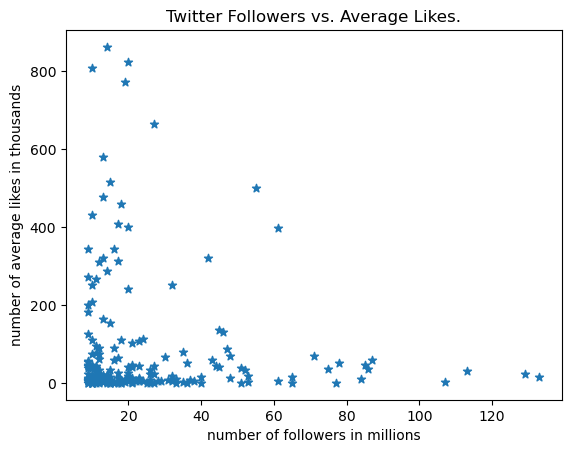

In [21]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
df = pd.DataFrame.from_dict(final_data)
num_of_followers = df["followers"]
num_of_avg_likes = df["avg. likes"]

plt.scatter(num_of_followers,num_of_avg_likes, marker="*")

plt.xlabel("number of followers in millions")
plt.ylabel("number of average likes in thousands")

plt.title("Twitter Followers vs. Average Likes.")
